# Data Fitting & Denoising
### Presentor Name: Amin Ariafar

____
____

### Auxiliary functions


In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

def load_image(path,size = (256,256)):
    img = cv2.imread(path,0)
    img = cv2.resize(img, size)
    return img

def show_image(image):
    plt.imshow(image,cmap='gray')
    
def load_data(path):
    file = open(path).read().split('\n')
    lines = [line.split() for line in file]
    return [(eval(x[0]),eval(x[1])) for x in lines ]

### Part 1


In [ ]:
def generate_D(n): # generate matrix D with shape:(n-1)*n for normalization
    D = np.zeros((n - 1, n))
    
    for i in range(n - 1):
        D[i, i] = 1
        D[i, i + 1] = -1
        
    return D


# find answer of rls with given matrices A and D and regularization factor lambda; denoise row by row
def denoise_rows(A, D, img, lamda): 
    n, m = img.shape
    denoised = np.zeros((n, m))

    for i in range(n):
        denoised[i, :] = ( np.linalg.solve( A + lamda*(D.T @ D), (img[i, :].T)) ).T

    return denoised

# find answer of rls with given matrices A and D and regularization factor lambda; denoise column by column
def denoise_cols(A, D, img, lamda): 
    n, m = img.shape
    denoised = np.zeros((n, m))

    for i in range(m):
        denoised[:, i] = np.linalg.solve( A + lamda*(D.T @ D), (img[:, i]))

    return denoised

D = generate_D(256) # the shape of D matrix is 256*255 based on our image size
A = np.eye(256) # the shape of A matrix is 256*255 based on our image size (equals I in denoising problem)
    



### Part 2

##### Denoising img1

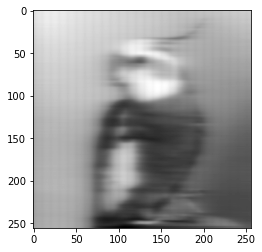

In [ ]:
img1 = load_image('./images/img1.png')

# we denoise img1 row by row as the noises are vertical. lambda is chosen based on noise fequency
denoised1 = denoise_rows(A, D, img1, 100)
show_image(denoised1)

##### Denoising img2

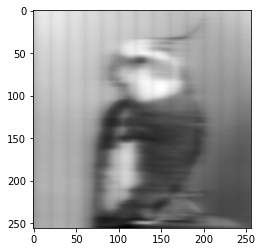

In [ ]:
img2 = load_image('./images/img2.png')

# we denoise img2 row by row as the noises are vertical. lambda is chosen based on noise fequency
denoised2 = denoise_rows(A, D, img2, 70)
show_image(denoised2)

##### Denoising img3

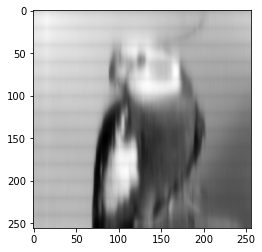

In [ ]:
img3 = load_image('./images/img3.png')

# we denoise img3 column by column as the noises are vertical. lambda is chosen based on noise fequency
denoised3 = denoise_cols(A, D, img3, 70)
show_image(denoised3)

##### Denoising img4

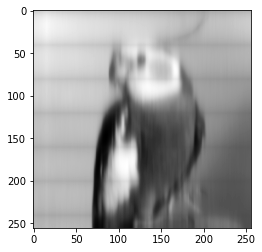

In [ ]:
img4 = load_image('./images/img4.png')

# we denoise img4 column by column as the noises are vertical. lambda is chosen based on noise fequency
denoised4 = denoise_cols(A, D, img4, 60)
show_image(denoised4)

##### Denoising img5

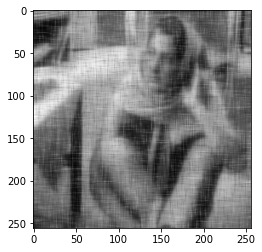

In [ ]:
img5 = load_image('./images/img5.png')

# we denoise img5 column by column and row by row and take the mean of outputs as the noises are random. lambda is chosen based on noise fequency
denoised5_c = denoise_cols(A, D, img5, 20)
denoised5_r = denoise_rows(A, D, img5, 20)
denoised5 = (denoised5_c + denoised5_r) / 2

show_image(denoised5)

##### Denoising img6

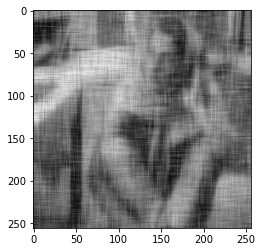

In [ ]:
img6 = load_image('./images/img6.png')

# we denoise img5 column by column and row by row and take the mean of outputs as the noises are random. lambda is chosen based on noise fequency
denoised6_c = denoise_cols(A, D, img6, 40)
denoised6_r = denoise_rows(A, D, img6, 40)
denoised6 = (denoised6_c + denoised6_r) / 2

show_image(denoised6)

___

### Part 3


Our method for eliminating noises from the pictures isn't necessarily a good one. <br /> <br />
The method we are using brings consecutive values of each row (or column) closer to each other. But as an example, in the first 4 pictures that the noises are ribbon-shaped, the width of noises doesn't equal to 1 pixel. This causes the difference of  consecutive values of each ribbon to be zero; and hence it cannot be lowered anymore. With setting lambda to a larger value as the edges of noise become similar to our picture, the ribbons pale more; but in this case we also lose a lot of detail from our original picture. <br /> <br />
In the 5th and 6th images, the noise particles are much smaller and also the contrast of consecutive pixels of the original picture is also less (comparing with the bird's picture). These two reasons makes our algorithm end up with a better output with these two pictures.

### Part 4


These two methods aren't equivalent. <br /> <br />
Running the RLS algorithm alpha times with lambda=1 results in a less noisy output. This is because we are computing the closest fit multiple times and this makes the final picture smoother. But on the downside, running RLS multiple times is more computationally expensive.  <br /> <br />
We demonstrate the difference between these two methods using "img1" which has more frequent noises among all bird pictures.

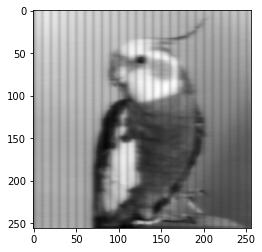

In [ ]:
alpha = 10
D = generate_D(256) # the shape of D matrix is 256*255 based on our image size
A = np.eye(256) # the shape of A matrix is 256*255 based on our image size (equals I in denoising problem)

# first method
denoised1_1 = denoise_rows(A, D, img1, alpha)
show_image(denoised1_1)

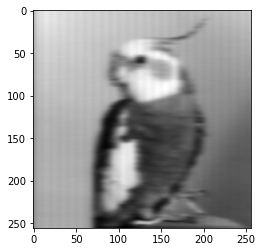

In [ ]:
alpha = 10
lamda = 1
D = generate_D(256) # the shape of D matrix is 256*255 based on our image size
A = np.eye(256) # the shape of A matrix is 256*255 based on our image size (equals I in denoising problem)

# second method
denoised1_2 = img1

for i in range(alpha):
    denoised1_2 = denoise_rows(A, D, denoised1_2, lamda)

show_image(denoised1_2)






### Part 5


As we know our original signal (picture) was smooth so most of its' data has still remained after the denoising procedure and the algorithm hasn't affected it as harsh as it affected the noises. To retrieve some of the detail of our original picture we can define a positive threshold e and use it as follows: <br /> <br />
Compare each entry of the denoised picture with the original picture. If the difference as smaller than e, replace the denoised entry with the original entry. Otherwise, keep the denoised entry. We test our method with denoised version of img1.

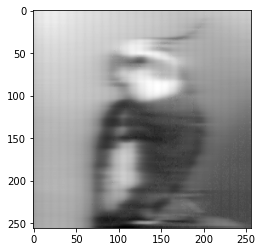

In [ ]:
e = 5
new_denoised = np.zeros((256, 256)) # the new picture

for i in range(256):

    for j in range(256):

        if (img1[i, j] - denoised1[i, j] < e and img1[i, j] - denoised1[i, j] > -e):
            new_denoised[i, j] = img1[i, j]

        else:
            new_denoised[i, j] = denoised1[i, j]

show_image(new_denoised)

We can see that some of the details of the original picture are back.